In [45]:
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import sqlite3
from Data import REAL_COLUMNS
import numpy as np
try:
    # Will try to use cupy if available
    import cupy as cp
    module = cp
except:
    module = np

In [46]:
def TienjenStatistic(x: np.ndarray, kRange):
    mean = x.mean()
    r = np.abs(x - mean)
    z = x[r.argsort()]
    if module != np:
        z = module.array(z)
    total = None
    denom = ((z - z.mean()) ** 2).sum()
    if denom != 0:
        E = []
        progressBar = tqdm(kRange)
        for k in progressBar:
            if total is None:
                total = z[:-(k + 1)].sum()
            total += z[-(k + 1)]
            mean = total / (len(z) - k)
            E.append(module.sum((z[:-k] - mean) ** 2) / denom)
        del z, total, denom, k, mean
        if module != np:
            cpE = module.array(E)
            npE = module.asnumpy(cpE)
            del cpE
            # return npE, kRange, col, conFunc
        else:
            npE = np.array(E)
    else:
        npE = np.zeros(len(kRange))

    return npE

In [47]:
count = 1000000 # Approximately the number of rows in the combined normal and attack data

Make a graph of random normally distributed Tietjen Statistics to compare to.

In [48]:
normalRandom = np.random.normal(size=count)
kRange = list(range(1, 20000))
e_norm = TienjenStatistic(normalRandom, kRange)

  0%|          | 0/19999 [00:00<?, ?it/s]

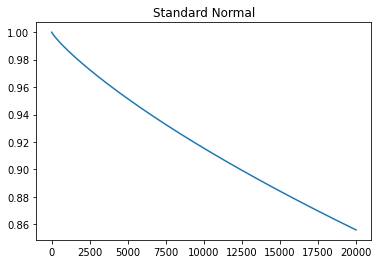

In [49]:
plt.plot(kRange, e_norm)
plt.title("Standard Normal")
plt.show()

In [50]:
con = sqlite3.connect("Tietjen.db")
cursor = con.cursor()

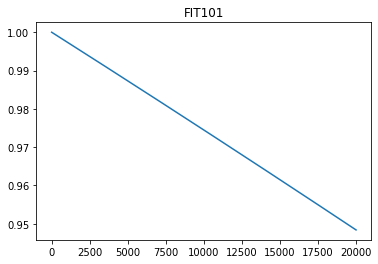

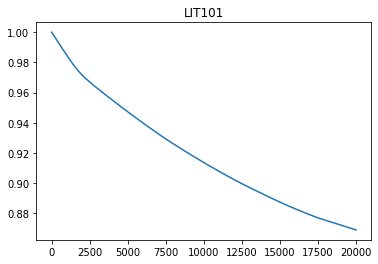

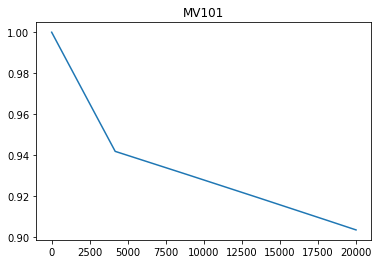

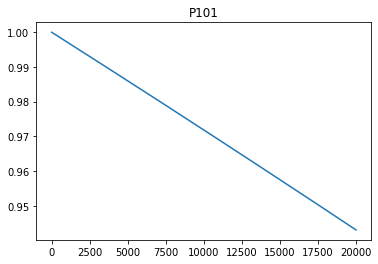

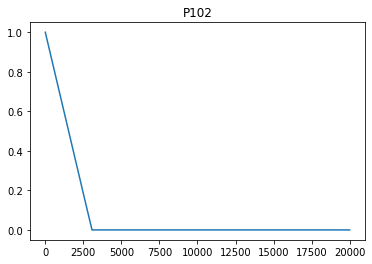

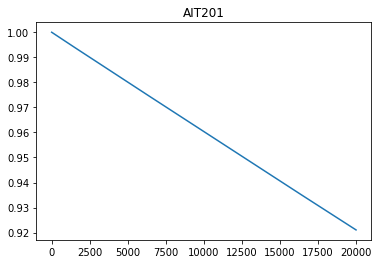

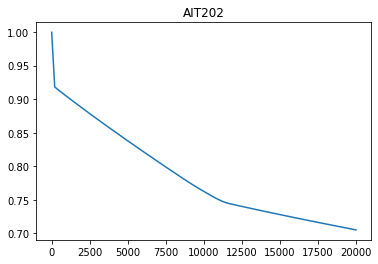

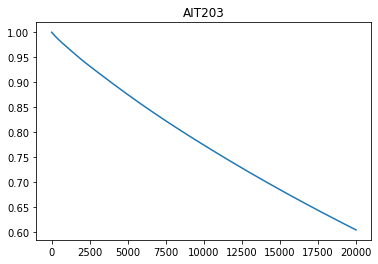

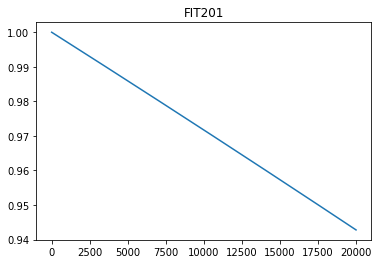

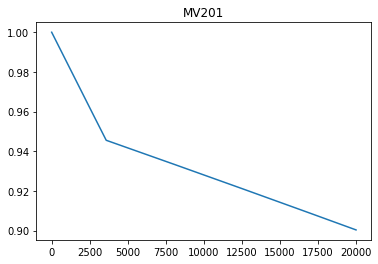

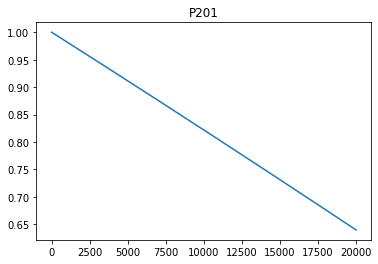

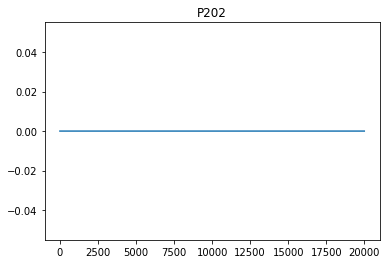

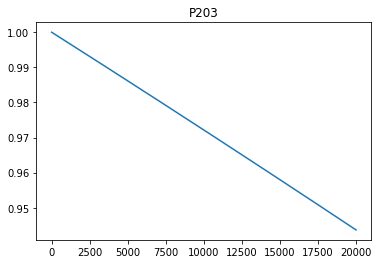

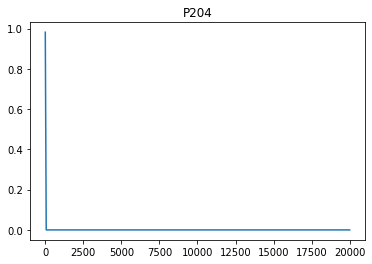

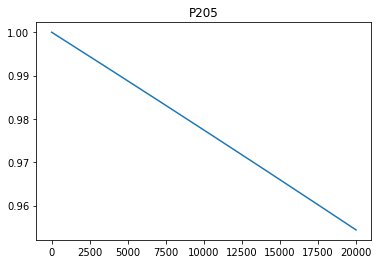

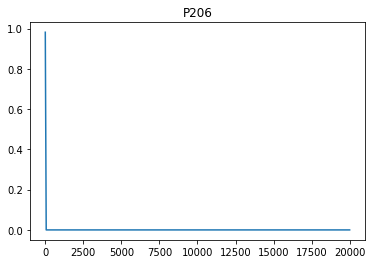

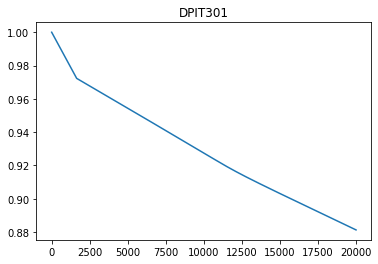

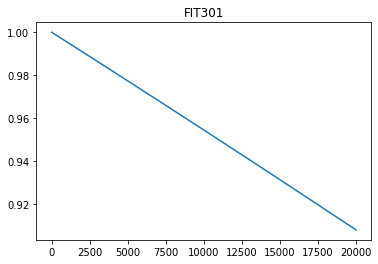

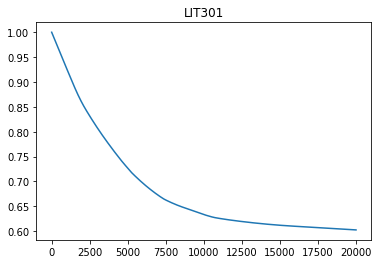

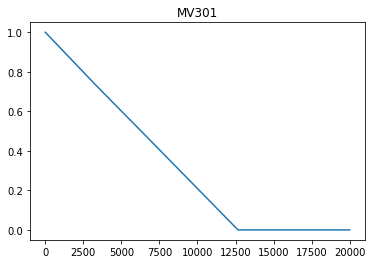

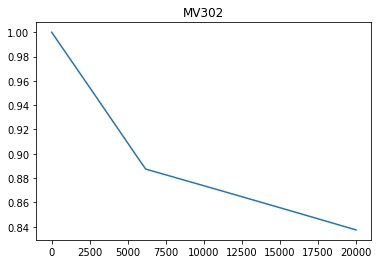

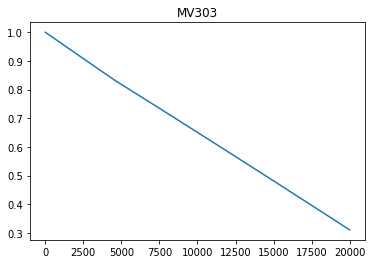

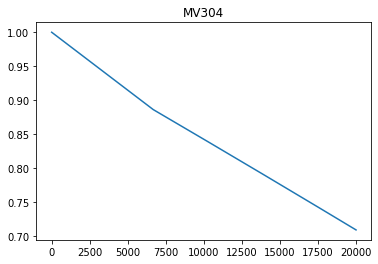

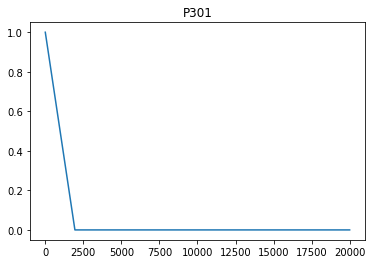

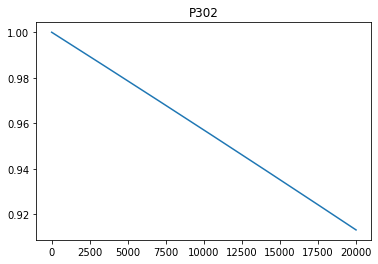

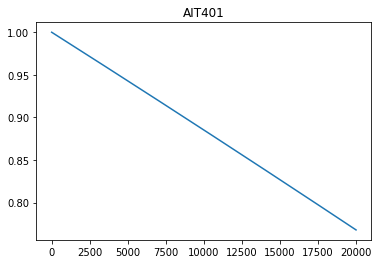

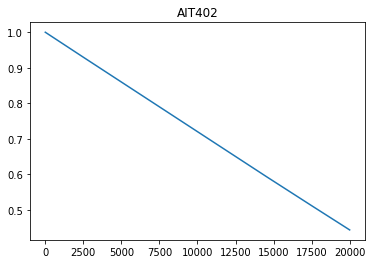

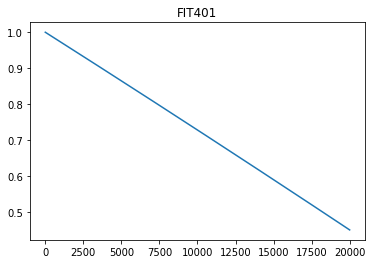

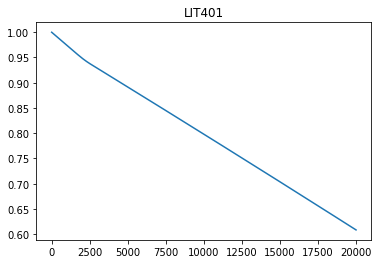

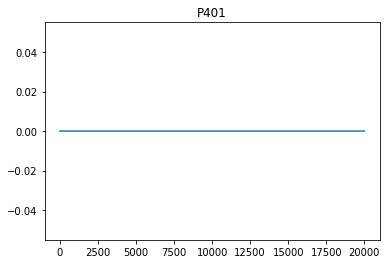

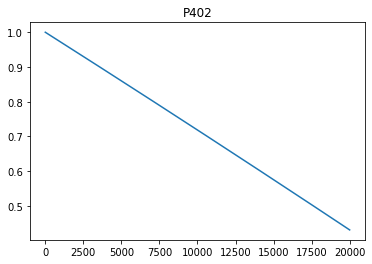

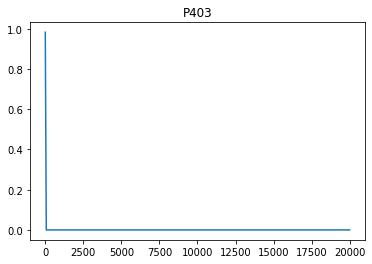

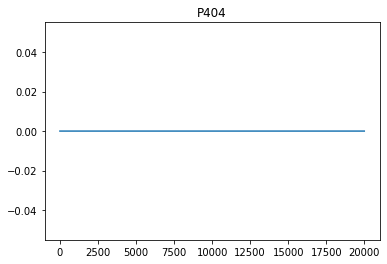

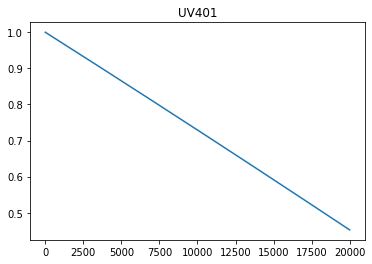

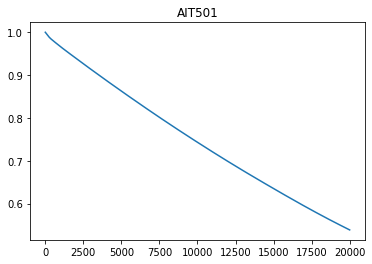

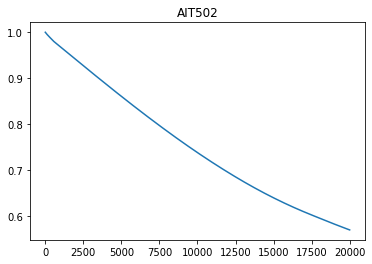

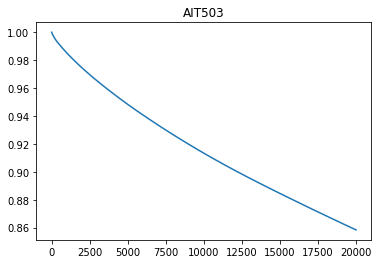

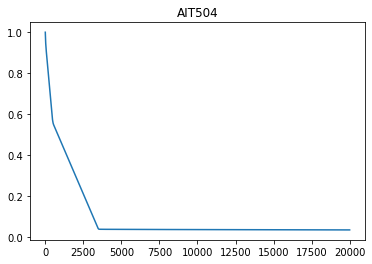

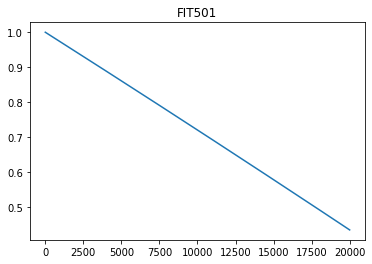

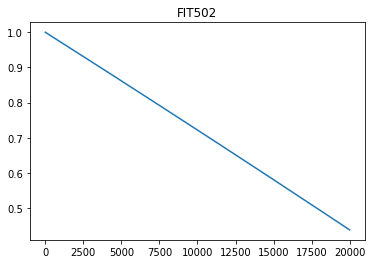

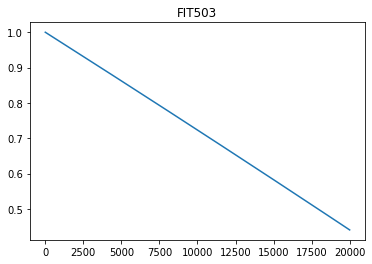

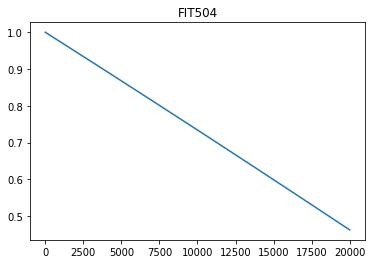

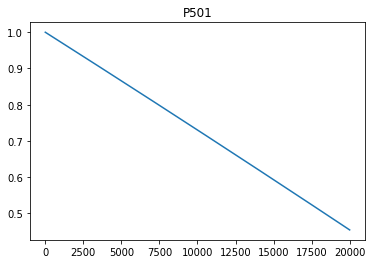

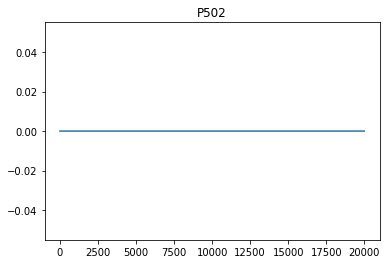

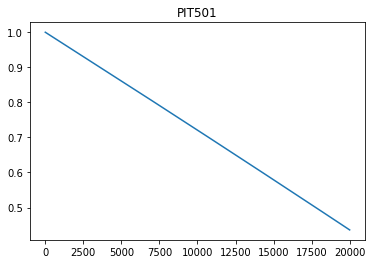

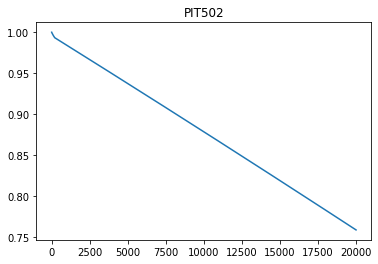

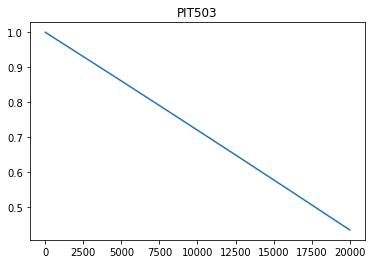

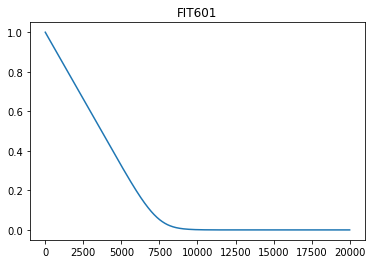

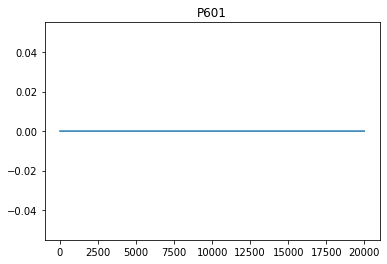

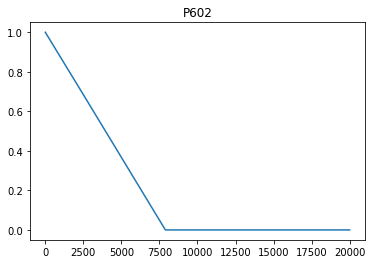

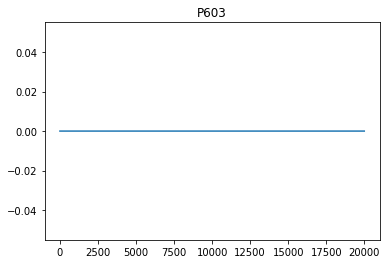

In [51]:
# Plot the graphs
for col in REAL_COLUMNS:
    try:
        result = np.array(list(cursor.execute(f"""SELECT K, VALUE FROM Tietjen_Statistics WHERE COL='{col}' ORDER BY K ASC""")))
    except:
        continue
    plt.plot(result[:, 0], result[:, 1])
    plt.title(col)
    plt.show()